# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [2]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'

    # Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
    try:
       del X_train, y_train
       del X_test, y_test
       print('Clear previously loaded data.')
    except:
       pass

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for your own interest.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [3]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

iteration 0 / 500: loss 165.325536
iteration 100 / 500: loss 159.201907
iteration 200 / 500: loss 153.309343
iteration 300 / 500: loss 147.665957
iteration 400 / 500: loss 142.226601
iteration 0 / 500: loss 863.581588
iteration 100 / 500: loss 691.358649
iteration 200 / 500: loss 553.825219
iteration 300 / 500: loss 444.029965
iteration 400 / 500: loss 356.351636
iteration 0 / 500: loss 4973.710939
iteration 100 / 500: loss 1404.743995
iteration 200 / 500: loss 401.386823
iteration 300 / 500: loss 119.312513
iteration 400 / 500: loss 40.011851
iteration 0 / 500: loss 28060.418298
iteration 100 / 500: loss 29.068165
iteration 200 / 500: loss 9.014355
iteration 300 / 500: loss 9.000009
iteration 400 / 500: loss 8.999999
iteration 0 / 500: loss 155402.286807
iteration 100 / 500: loss 9.000000
iteration 200 / 500: loss 9.000000
iteration 300 / 500: loss 9.000000
iteration 400 / 500: loss 9.000000
iteration 0 / 500: loss 168.451153
iteration 100 / 500: loss 156.163319
iteration 200 / 500: l

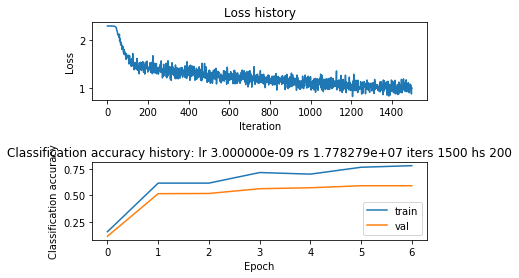

lr 1.000000e-09 reg 1.000000e+05 train accuracy: 0.072265 val accuracy: 0.072000
lr 1.000000e-09 reg 5.623413e+05 train accuracy: 0.101041 val accuracy: 0.100000
lr 1.000000e-09 reg 3.162278e+06 train accuracy: 0.086429 val accuracy: 0.099000
lr 1.000000e-09 reg 1.778279e+07 train accuracy: 0.408837 val accuracy: 0.407000
lr 1.000000e-09 reg 1.000000e+08 train accuracy: 0.409429 val accuracy: 0.407000
lr 2.000000e-09 reg 1.000000e+05 train accuracy: 0.098878 val accuracy: 0.124000
lr 2.000000e-09 reg 5.623413e+05 train accuracy: 0.114469 val accuracy: 0.111000
lr 2.000000e-09 reg 3.162278e+06 train accuracy: 0.109224 val accuracy: 0.114000
lr 2.000000e-09 reg 1.778279e+07 train accuracy: 0.412959 val accuracy: 0.399000
lr 2.000000e-09 reg 1.000000e+08 train accuracy: 0.394102 val accuracy: 0.383000
lr 3.000000e-09 reg 1.000000e+05 train accuracy: 0.116592 val accuracy: 0.127000
lr 3.000000e-09 reg 5.623413e+05 train accuracy: 0.098571 val accuracy: 0.098000
lr 3.000000e-09 reg 3.162278

In [74]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-9, 1e-8, 1e-7]
regularization_strengths = [5e4, 5e5, 5e6]

results = {}
best_val = -1
best_svm = None

################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

best_lr=None
best_rs=None
for lr in np.linspace(1e-9,5e-9,5):
    for rs in np.logspace(5,8,5):
        svm = LinearSVM()
        loss_hist = svm.train(X_train_feats, y_train, learning_rate=lr, reg=rs,
                              num_iters=500, verbose=True)
        
        Yt = svm.predict(X_train_feats)
        Yp = svm.predict(X_val_feats)
        
        t_num_correct = np.sum(Yt == y_train)
        t_accuracy = float(t_num_correct) / X_train.shape[0]
        
        v_num_correct = np.sum(Yp == y_val)
        v_accuracy = float(v_num_correct) / X_val.shape[0]
        
        results[(lr,rs)] = (t_accuracy ,v_accuracy)
        
        if (best_val<v_accuracy):
            best_val = v_accuracy
            best_svm = svm
            best_lr=lr
            best_rs=rs
            
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(best_stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplots_adjust(hspace=0.8)

plt.subplot(2, 1, 2)
plt.plot(best_stats['train_acc_history'], label='train')
plt.plot(best_stats['val_acc_history'], label='val')
plt.title('Classification accuracy history: lr %e rs %e iters %d hs %d' % (
                best_lr, best_rs, best_iters, best_hs))
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# Print out results.
for lr, rs in sorted(results):
    train_accuracy, val_accuracy = results[(lr, rs)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, rs, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

In [75]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.414


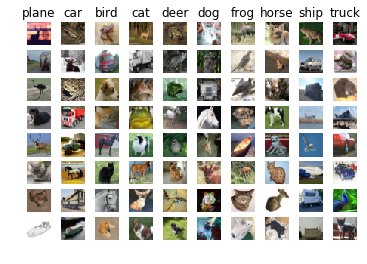

In [76]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?


$\color{blue}{\textit Your Answer:}$

It seems like most failures are pictures of animals with very close framing. This makes sense if the classifier mostly learned the profile of the animals without focusing on features like their fine details or fur patterns. At this low resolution, it seems likely that the driving force behind many of these is the background color/uniformity. For example, most images that were misclassified as ships have blue backgrounds.


## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [15]:
# Preprocessing: Remove the bias dimension
# Make sure to run this cell only ONCE
print(X_train_feats.shape)
X_train_feats = X_train_feats[:, :-1]
X_val_feats = X_val_feats[:, :-1]
X_test_feats = X_test_feats[:, :-1]

print(X_train_feats.shape)

(49000, 155)
(49000, 154)


Trying combination 1 out of 12 ...
iteration 0 / 1500: loss 2.302585
iteration 100 / 1500: loss 2.302196
iteration 200 / 1500: loss 2.151353
iteration 300 / 1500: loss 1.779974
iteration 400 / 1500: loss 1.643599
iteration 500 / 1500: loss 1.477532
iteration 600 / 1500: loss 1.395102
iteration 700 / 1500: loss 1.478518
iteration 800 / 1500: loss 1.316066
iteration 900 / 1500: loss 1.319829
iteration 1000 / 1500: loss 1.439714
iteration 1100 / 1500: loss 1.190621
iteration 1200 / 1500: loss 1.285246
iteration 1300 / 1500: loss 1.424394
iteration 1400 / 1500: loss 1.234824
Trying combination 2 out of 12 ...
iteration 0 / 1500: loss 2.302585
iteration 100 / 1500: loss 2.142591
iteration 200 / 1500: loss 1.650439
iteration 300 / 1500: loss 1.436816
iteration 400 / 1500: loss 1.508764
iteration 500 / 1500: loss 1.416384
iteration 600 / 1500: loss 1.420158
iteration 700 / 1500: loss 1.211508
iteration 800 / 1500: loss 1.423228
iteration 900 / 1500: loss 1.235630
iteration 1000 / 1500: loss 1

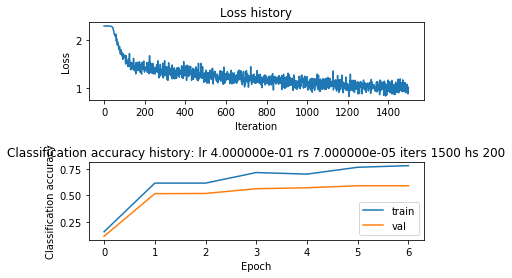

In [72]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

regularization_strengths = [1e-5, 1e-4]
results = {}
best_val = -1 
input_size = 32 * 32 * 3
num_classes = 10

#ranges
lr_range = np.linspace(1e-1,5e-1,5)
rs_range = np.linspace(regularization_strengths[0],regularization_strengths[1],4)
iters_range = [1500]
hs_range = np.linspace(200,400,4, dtype=int)

#initial values
best_lr = lr_range[0]
best_rs = rs_range[0]
best_iters = iters_range[0]
best_stats=None
best_hs=hs_range[0]

#track progress
combinations = len(lr_range) + len(rs_range) + len(iters_range) +len(hs_range) -2
c=1

#sweep lr holding others constant
for lr in lr_range:
    print("Trying combination",c,"out of",combinations,"...")
    c+=1
    
    net = TwoLayerNet(input_dim, hidden_dim, num_classes)
    stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
        num_iters=best_iters, batch_size=200,
        learning_rate=lr, learning_rate_decay=0.95,
        reg=best_rs, verbose=True)

    t_accuracy = stats["train_acc_history"][-1]
    v_accuracy = stats["val_acc_history"][-1]

    results[(lr,best_rs,best_iters)] = (t_accuracy ,v_accuracy)

    if (best_val<v_accuracy):
        best_val = v_accuracy
        best_net = net
        best_lr = lr
        best_stats = stats

#sweep rs holding others constant    
for rs in rs_range[1:]:
    print("Trying combination",c,"out of",combinations,"...")
    c+=1
    
    net = TwoLayerNet(input_dim, hidden_dim, num_classes)

    stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
        num_iters=best_iters, batch_size=200,
        learning_rate=best_lr, learning_rate_decay=0.95,
        reg=rs, verbose=True)

    t_accuracy = stats["train_acc_history"][-1]
    v_accuracy = stats["val_acc_history"][-1]

    results[(best_lr,rs,best_iters)] = (t_accuracy ,v_accuracy)

    if (best_val<v_accuracy):
        best_val = v_accuracy
        best_net = net
        best_rs = rs
        best_stats = stats

#sweep iters holding others constant
for iters in iters_range[1:]:
    print("Trying combination",c,"out of",combinations,"...")
    c+=1
    
    net = TwoLayerNet(input_dim, hidden_dim, num_classes)

    stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
        num_iters=iters, batch_size=200,
        learning_rate=best_lr, learning_rate_decay=0.95,
        reg=best_rs, verbose=True)

    t_accuracy = stats["train_acc_history"][-1]
    v_accuracy = stats["val_acc_history"][-1]

    results[(best_lr,best_rs,iters)] = (t_accuracy ,v_accuracy)

    if (best_val<v_accuracy):
        best_val = v_accuracy
        best_net = net
        best_iters = iters
        best_stats = stats
        
for hs in hs_range[1:]:
    print("Trying combination",c,"out of",combinations,"...")
    c+=1
    
    net = TwoLayerNet(input_dim, hs, num_classes)

    stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
        num_iters=best_iters, batch_size=200,
        learning_rate=best_lr, learning_rate_decay=0.95,
        reg=best_rs, verbose=True)

    t_accuracy = stats["train_acc_history"][-1]
    v_accuracy = stats["val_acc_history"][-1]

    results[(best_lr,best_rs,best_iters)] = (t_accuracy ,v_accuracy)

    if (best_val<v_accuracy):
        best_val = v_accuracy
        best_net = net
        best_hs = hs
        best_stats = stats    
 
# Print out results.
for lr, rs, iters in sorted(results):
    train_accuracy, val_accuracy = results[(lr, rs, iters)]
    print('lr %e rs %e iters %d train accuracy: %f val accuracy: %f' % (
                lr, rs, iters, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)
print('best parameters: lr %e rs %e iters %d hs %d' % (
                best_lr, best_rs, best_iters, best_hs))

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(best_stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplots_adjust(hspace=0.8)

plt.subplot(2, 1, 2)
plt.plot(best_stats['train_acc_history'], label='train')
plt.plot(best_stats['val_acc_history'], label='val')
plt.title('Classification accuracy history: lr %e rs %e iters %d hs %d' % (
                best_lr, best_rs, best_iters, best_hs))
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


In [73]:
# Run your best neural net classifier on the test set. You should be able
# to get more than 55% accuracy.

test_acc = (best_net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.579


#### 